### Bayesian data analysis
##  Chapter 9, demo 1

Gelman 교수는 동전 항아리를 가지고 있습니다. 그는 학생들이 얼마나 많은 동전이 있는지를 옳게 추측하면 항아리의 모든 동전을 줄 것이라 약속합니다. 학생들은 토론을 거쳐 각자 다른 값을 추측했습니다. 최종적으로 그들은 항아리 속 동전 수가 정규분포 N (160,40)를 따른다고 제시합니다. 그들은 어떤 가치를 추측해야합니까?

In [74]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)
import plot_tools
plt.rc('font', size=12)

In [75]:
# 분포의 평균과 표준편차
m = 160     
s = 40      

x = np.arange(m-3*s, m+3*s+1)

# 각 x(동전의 개수)와 x발생확률의 곱이 value이므로
# 표준정규가 아닌 평균 m, 표준편차 s인 정규분포 형태로 진행
px = stats.norm.pdf(x, loc=m, scale=s)
xpx = x * px

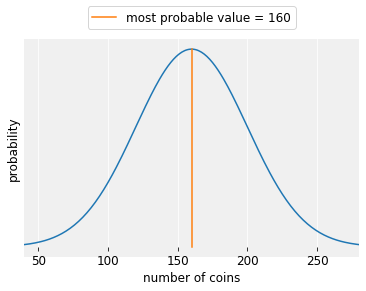

In [76]:
plt.plot(x, px)
plot_tools.modify_axes.only_x(plt.gca())
plt.xlim([x[0], x[-1]])
plt.ylabel('probability')
plt.xlabel('number of coins')

# 만약 학생들이 얻는 돈의 가치가 아닌 옳은 예측만 원한다면,
# 그들은 예측값을 최빈값으로 설정해야하다.
h2, = plt.plot([m, m], [0, stats.norm.pdf(m, loc=m, scale=s)])
plt.legend(
    (h2,),
    ('most probable value = {}'.format(m),),
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02)
);

In [77]:
# 배경효과 설정
plt.style.use(plot_tools.custom_styles['gray_background'])

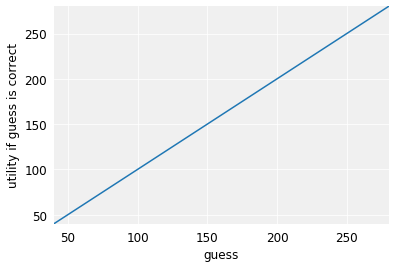

In [78]:
# 그러나 효용의 기댓값(얻는 돈 value최댓값)을 원할 수도 있다.
# 돈의 가치와 효용은 선형이라 가정하자. 
# 효용함수 plot
plt.plot(x, x)
plt.ylabel('utility if guess is correct')
plt.xlabel('guess')
plt.xlim([x[0], x[-1]])
plt.ylim([x[0], x[-1]]);

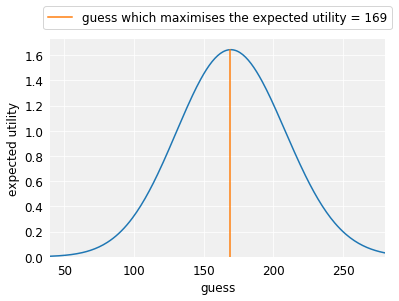

In [79]:
# 만약 학생들이 value a를 추측한다면, 그들이 추측한 예측 불확실성을 바탕으로 볼 때
# 그들이 동전을 얻을 확률은 p(a)이며 따라서 효용 기댓값은 a*p(a)가 된다. 
# 효용 기댓값 plot
plt.plot(x, xpx)
plt.ylabel('expected utility')
plt.xlabel('guess')
plt.ylim([0, plt.ylim()[1]])
plt.xlim([x[0], x[-1]])

# 최대 효용 기댓값 계산
mi = np.argmax(xpx)
meu = xpx[mi]
meux = x[mi]
h3, = plt.plot([meux, meux], [0, meu])
plt.legend(
    (h3,),
    ('guess which maximises the expected utility = {}'.format(meux),),
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02)
);

참고로 xpx가 정규분포같지만, 실제로 qqplot을 그려보면 정규분포가 아닙니다. 왼쪽으로 약간 치우쳐져있습니다.

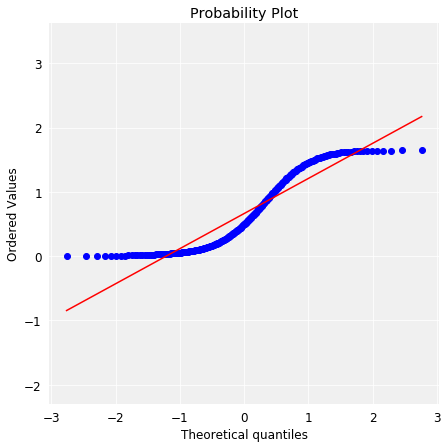

In [81]:
from scipy import stats as sp
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sp.probplot(xpx, plot=plt)
plt.axis("equal")
plt.show()